In [ ]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "kaggle.json"

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/uber-fares-dataset")

In [1]:
dataset_path = "./uber-fares-dataset/uber.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
from math import radians, cos, sin, asin, sqrt

def haversine_dist(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [6]:
df[df.isnull()["dropoff_longitude"] == True]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [7]:
df.dropna(inplace = True)

In [8]:
df['distance_km'] = df.apply(lambda row: haversine_dist(row['pickup_longitude'], row['pickup_latitude'], 
                                                          row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Check this operation again

In [ ]:
df["distance_km"].describe()

In [ ]:
df["fare_amount"].describe()

In [9]:
key_locations = {
"CentralPark" : [40.7826, -73.9656],
"Times Square" : 	[40.758896, -73.985130],
"World Trade Center" : [40.7127, -74.0134],
"New York University" : [40.729675 , -73.996925],
"Columbia University" : [40.8075, -73.9626],
"Rutgers University" : [40.5018, -74.4479],
"Wall Street" : [40.7069, -74.0113],
"Madison Square Garden" : [40.7505, -73.9934],
"Broadway theatre" : [40.7632, -73.9831],
"Yankee Stadium" : [40.8296, -73.9262],
"Museum of Modern Art" : [40.7614, -73.9776],
"Chinatown" : [40.7158, -73.9970],
"Federal Reserve Bank of New York" : [40.7084, -74.0087]}

In [10]:
type(key_locations["Times Square"])

list

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_new,y='fare_amount')

# Add title and labels
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Distance')
plt.ylabel('Fare')

# Show the plot
plt.show()

# Data Cleaning

In [10]:
def select_data_range(fare, dist):
    return df[(df["fare_amount"] >= fare[0]) & (df["fare_amount"] <= fare[1]) & (df["distance_km"] >= dist[0]) & (df["distance_km"] <= dist[1])]

In [11]:
fare = [0.0,40]
dist = [0.0, 15]

In [12]:
df_new = select_data_range(fare, dist)
df_new

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


# Parameter Tuning

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_cols = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude","passenger_count","distance_km"]
y_train_cols = ["fare_amount"]

In [15]:
df_new[train_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_new[train_cols],df_new[y_cols] , test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1 = LinearRegression().fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [23]:
test_check = pd.DataFrame({
    "pickup_longitude": [40.711977],
    "pickup_latitude": [-74.008157],
    "dropoff_longitude": [40.730864],
    "dropoff_latitude": [-73.974017],
    "passenger_count": [1],
    "distance_km": 0.0
})

In [24]:
test_check["distance_km"] = test_check.apply(lambda row: haversine_dist(row['pickup_longitude'], row['pickup_latitude'], 
                                                          row['dropoff_longitude'], row['dropoff_latitude']), axis=1)
test_check

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,40.711977,-74.008157,40.730864,-73.974017,1,3.840125


In [25]:
model1.predict(test_check)

array([[13.44510994]])

In [26]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_pred, y_test)

3.197437359483756

In [30]:
def plot_rmse(fare, dist):
    rmse_list = []
    for i,j in (zip(fare, dist)):
        df_new = select_data_range(i, j)
        
        X_train, X_test, y_train, y_test = train_test_split(df_new[train_cols],df_new[y_cols] , test_size=0.2, random_state=42)
        
        model1 = LinearRegression().fit(X_train, y_train)
        y_pred = model1.predict(X_test)
            
        rmse_list.append(root_mean_squared_error(y_pred, y_test))
    return rmse_list

In [31]:
fare = [[0.0, 40],[0.0, 50], [0.0, 80], [0.0, 100], [0.0, 120], [0.0, 150]]
dist = [[0.0,8], [0.0,10], [0.0, 15], [0.0, 15], [0.0, 20], [0.0, 25]]
plot_rmse(fare,dist)

[2.871044730643707,
 3.5203328011307433,
 4.2915370980489635,
 4.685434500776431,
 4.6672878758078,
 4.9816686070502065]

In [32]:
def train_lin_reg_model(df_new,train_cols,test_cols):
    X_train, X_test, y_train, y_test = train_test_split(df_new[train_cols],df_new[test_cols] , test_size=0.2, random_state=42)
    model1 = LinearRegression().fit(X_train, y_train)
    y_pred = model1.predict(X_test)
    print(root_mean_squared_error(y_pred, y_test))
    return model1

# Adding New Features

In [34]:
model = train_lin_reg_model(df_new,train_cols,y_cols)

3.197437359483756


In [35]:
model.predict(test_check)

array([[13.44510994]])

In [36]:
for key in key_locations.keys():
    print(key_locations[key])

[40.7826, -73.9656]
[40.758896, -73.98513]
[40.7127, -74.0134]
[40.729675, -73.996925]
[40.8075, -73.9626]
[40.5018, -74.4479]
[40.7069, -74.0113]
[40.7505, -73.9934]
[40.7632, -73.9831]
[40.8296, -73.9262]
[40.7614, -73.9776]
[40.7158, -73.997]
[40.7084, -74.0087]


In [37]:
for key in key_locations.keys():
    df_new[key +'_distance_km'] = df_new.apply(lambda row: haversine_dist(row['pickup_longitude'], row['pickup_latitude'], key_locations[key][1], key_locations[key][0]), axis=1)

C:\Users\souvi\AppData\Local\Temp\ipykernel_1620\4205828936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[key +'_distance_km'] = df_new.apply(lambda row: haversine_dist(row['pickup_longitude'], row['pickup_latitude'], key_locations[key][1], key_locations[key][0]), axis=1)
C:\Users\souvi\AppData\Local\Temp\ipykernel_1620\4205828936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[key +'_distance_km'] = df_new.apply(lambda row: haversine_dist(row['pickup_longitude'], row['pickup_latitud

In [38]:
df_new

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,...,New York University_distance_km,Columbia University_distance_km,Rutgers University_distance_km,Wall Street_distance_km,Madison Square Garden_distance_km,Broadway theatre_distance_km,Yankee Stadium_distance_km,Museum of Modern Art_distance_km,Chinatown_distance_km,Federal Reserve Bank of New York_distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,...,0.995317,8.302898,46.066748,3.628901,1.454773,3.100951,11.889513,3.173258,2.519069,3.413791
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,...,0.269988,9.211698,45.819950,2.768069,2.478173,4.002955,12.649085,3.949718,1.399463,2.514188
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,...,1.410631,8.235918,45.859924,3.802904,1.460347,3.104352,11.900719,3.256703,2.858058,3.612548
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,...,7.023690,2.173949,51.159205,9.793199,4.716054,3.129494,6.018758,3.276382,8.527780,9.569255
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,...,6.266352,7.728811,51.703367,8.363942,5.804133,5.333783,9.509350,4.829172,6.831981,8.091048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,...,1.361928,7.850646,47.018919,4.148768,1.348840,2.670831,11.265446,2.575830,2.751600,3.897168
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,...,1.300549,8.075180,47.024716,4.012223,1.686007,2.934614,11.431213,2.796396,2.557804,3.752558
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,...,3.119772,6.005275,48.180125,5.911064,0.911009,0.785844,9.562973,0.895001,4.617856,5.678349
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,...,0.469828,9.575359,45.456133,2.383947,2.802778,4.360437,13.029828,4.322366,1.073351,2.132424


In [39]:
list(key_locations.keys())

['CentralPark',
 'Times Square',
 'World Trade Center',
 'New York University',
 'Columbia University',
 'Rutgers University',
 'Wall Street',
 'Madison Square Garden',
 'Broadway theatre',
 'Yankee Stadium',
 'Museum of Modern Art',
 'Chinatown',
 'Federal Reserve Bank of New York']

In [40]:
train_cols.extend([location + "_distance_km" for location in key_locations.keys()])

In [41]:
train_cols

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'distance_km',
 'CentralPark_distance_km',
 'Times Square_distance_km',
 'World Trade Center_distance_km',
 'New York University_distance_km',
 'Columbia University_distance_km',
 'Rutgers University_distance_km',
 'Wall Street_distance_km',
 'Madison Square Garden_distance_km',
 'Broadway theatre_distance_km',
 'Yankee Stadium_distance_km',
 'Museum of Modern Art_distance_km',
 'Chinatown_distance_km',
 'Federal Reserve Bank of New York_distance_km']

In [42]:
df_new[train_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,CentralPark_distance_km,Times Square_distance_km,World Trade Center_distance_km,New York University_distance_km,Columbia University_distance_km,Rutgers University_distance_km,Wall Street_distance_km,Madison Square Garden_distance_km,Broadway theatre_distance_km,Yankee Stadium_distance_km,Museum of Modern Art_distance_km,Chinatown_distance_km,Federal Reserve Bank of New York_distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,5.701867,2.597738,3.073645,0.995317,8.302898,46.066748,3.628901,1.454773,3.100951,11.889513,3.173258,2.519069,3.413791
1,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,6.513305,3.497888,2.357156,0.269988,9.211698,45.819950,2.768069,2.478173,4.002955,12.649085,3.949718,1.399463,2.514188
2,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,5.715773,2.622225,3.199699,1.410631,8.235918,45.859924,3.802904,1.460347,3.104352,11.900719,3.256703,2.858058,3.612548
3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,1.274897,3.632499,9.239143,7.023690,2.173949,51.159205,9.793199,4.716054,3.129494,6.018758,3.276382,8.527780,9.569255
4,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,5.479051,5.324258,8.224223,6.266352,7.728811,51.703367,8.363942,5.804133,5.333783,9.509350,4.829172,6.831981,8.091048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,5.135308,2.177491,3.704866,1.361928,7.850646,47.018919,4.148768,1.348840,2.670831,11.265446,2.575830,2.751600,3.897168
199996,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,5.337402,2.453090,3.611607,1.300549,8.075180,47.024716,4.012223,1.686007,2.934614,11.431213,2.796396,2.557804,3.752558
199997,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,3.374510,0.278092,5.387886,3.119772,6.005275,48.180125,5.911064,0.911009,0.785844,9.562973,0.895001,4.617856,5.678349
199998,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,6.886990,3.853587,1.972897,0.469828,9.575359,45.456133,2.383947,2.802778,4.360437,13.029828,4.322366,1.073351,2.132424


In [43]:
for key in key_locations.keys():
    test_check[key + "_distance_km"] = df_new.apply(lambda row: haversine_dist(row['pickup_longitude'], row['pickup_latitude'], key_locations[key][1], key_locations[key][0]), axis=1)
test_check

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,CentralPark_distance_km,Times Square_distance_km,World Trade Center_distance_km,New York University_distance_km,Columbia University_distance_km,Rutgers University_distance_km,Wall Street_distance_km,Madison Square Garden_distance_km,Broadway theatre_distance_km,Yankee Stadium_distance_km,Museum of Modern Art_distance_km,Chinatown_distance_km,Federal Reserve Bank of New York_distance_km
0,40.711977,-74.008157,40.730864,-73.974017,1,3.840125,5.701867,2.597738,3.073645,0.995317,8.302898,46.066748,3.628901,1.454773,3.100951,11.889513,3.173258,2.519069,3.413791


In [44]:
model = train_lin_reg_model(df_new,train_cols,y_cols)
model.predict(test_check)

3.1472985080463087


array([[85.9144863]])

In [ ]:
model = train_lin_reg_model(df_new,train_cols,y_cols)

# NOTE
# Spliting the SET

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the sizes for each set
train_size = 0.6
val_size = 0.2
test_size = 0.2

# Calculate the number of samples for each set
train_end = int(train_size * len(df))
val_end = train_end + int(val_size * len(df))

# Split the DataFrame
train_df = df.iloc[:train_end]
val_df = df.iloc[train_end:val_end]
test_df = df.iloc[val_end:]

# Display the results
print("Training Set:")
print(train_df)
print("\nValidation Set:")
print(val_df)
print("\nTest Set:")
print(test_df)

In [50]:
df_new[train_cols].head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,CentralPark_distance_km,Times Square_distance_km,World Trade Center_distance_km,New York University_distance_km,Columbia University_distance_km,Rutgers University_distance_km,Wall Street_distance_km,Madison Square Garden_distance_km,Broadway theatre_distance_km,Yankee Stadium_distance_km,Museum of Modern Art_distance_km,Chinatown_distance_km,Federal Reserve Bank of New York_distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,5.701867,2.597738,3.073645,0.995317,8.302898,46.066748,3.628901,1.454773,3.100951,11.889513,3.173258,2.519069,3.413791
1,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,6.513305,3.497888,2.357156,0.269988,9.211698,45.819950,2.768069,2.478173,4.002955,12.649085,3.949718,1.399463,2.514188
2,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,5.715773,2.622225,3.199699,1.410631,8.235918,45.859924,3.802904,1.460347,3.104352,11.900719,3.256703,2.858058,3.612548
3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,1.274897,3.632499,9.239143,7.023690,2.173949,51.159205,9.793199,4.716054,3.129494,6.018758,3.276382,8.527780,9.569255
4,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,5.479051,5.324258,8.224223,6.266352,7.728811,51.703367,8.363942,5.804133,5.333783,9.509350,4.829172,6.831981,8.091048


In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_new[train_cols],df_new[y_cols] , test_size=0.2, random_state=42)

# Gradient Boosting Models

In [66]:
from xgboost import XGBRegressor, plot_importance

In [53]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [54]:
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 50,
    'eval_metric': 'logloss'
}

In [55]:
%%time
model.fit(X_train, y_train)

CPU times: total: 1.55 s
Wall time: 265 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [58]:
y_pred = model.predict(X_test)

In [57]:
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

In [59]:
def rmse(a, b):
    return root_mean_squared_error(a, b)

In [60]:
rmse(y_test,y_pred)

2.9379672153784173

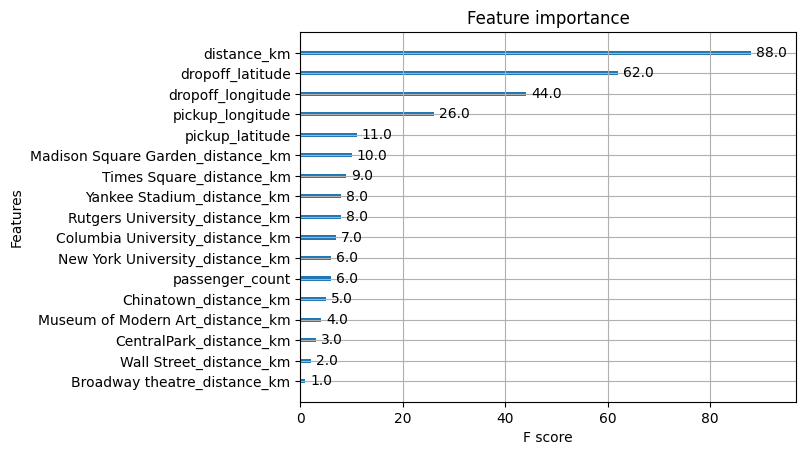

In [67]:
import matplotlib.pyplot as plt

plot_importance(model)
plt.show()

In [68]:
model.predict(test_check)

array([14.562634], dtype=float32)

In [69]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)